In [211]:
import pandas as pd
import nltk

In [212]:
df = pd.read_csv('boston.csv')

In [214]:
df.head()

,text,id,from_user,iso_language_code
0,RT @ItsJennaMarbles: Reports of Marathon Runne...,323906397609791488,sangyashrestha,en
1,RT @NBCSN: Reports of Marathon Runners that cr...,323906397618196483,ChelseaGilson,en
2,RT @NBCSN: Reports of Marathon Runners that cr...,323906397735641088,Blakstoise,en
3,RT @PeterBurnsRadio: RT @NBCSN: Reports of Mar...,323906397853073410,markson,en
4,RT @NBCSN: Reports of Marathon Runners that cr...,323906397962121216,MarlyCakes85,en


In [215]:
ids = []
for i in xrange(251):
    ids.append(df.loc[i]['id'])

In [216]:
seed = [323906397735641088,323906483584655360,323906657333682176,323907258301939713,323909308188344320,323913403460636673,
324067437886713856,324117950774775809,324138055772561408,324219503401644033,324320247018573824,324346553835868161,324372750330363904,
324408472441585664,324422817565257728,324448013999304704,324785120085176320,325059351209443329,325060324992643072,
325162944931438592,325253327048822784,325337623910559745,325409910642835456,325701934273134594,325946633986641920]


In [217]:
df.shape

(251, 4)

In [218]:
df['text'][0]

'RT @ItsJennaMarbles: Reports of Marathon Runners that crossed finish line and continued to run to Mass General Hospital to give blood to victims. #PrayforBoston'

In [219]:
from nltk.corpus import stopwords

In [220]:
stopwords = set(stopwords.words('english'))

In [221]:
len(stopwords) 

153

In [222]:
df.loc[0]

text                 RT @ItsJennaMarbles: Reports of Marathon Runne...
id                                                  323906397609791488
from_user                                               sangyashrestha
iso_language_code                                                   en
Name: 0, dtype: object

In [223]:
import numpy as np
df['links'] = np.nan   #Adding new column for urls present in the tweets.

In [226]:
import re
tweets = []
for i in xrange(251):
    tweets.append(df.loc[i]['text'])

len(tweets)


251

In [229]:
for i,each in enumerate(tweets):     
    write_tweet = []
    #urls present in the tweet.
    urls = []
    #url for the tweet saved in the corresponding column.
    urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', each)
    at_the_rate = re.findall('@\w+[:," ",")"]',each)
    for word in each.split():
        if word not in urls and word not in at_the_rate:
            write_tweet.append(word)
    write_tweet = ' '.join(write_tweet)
    tweets[i] = write_tweet
tweets

['RT Reports of Marathon Runners that crossed finish line and continued to run to Mass General Hospital to give blood to victims. #PrayforBoston',
 'RT Reports of Marathon Runners that crossed finish line and continued to run to Mass General Hospital to give blood to victims #PrayforBoston',
 'RT Reports of Marathon Runners that crossed finish line and continued to run to Mass General Hospital to give blood to victims #PrayforBoston',
 'RT RT Reports of Marathon Runners that crossed finish line and continued to run to Mass General Hospital to give blood to victims #PrayforBoston',
 'RT Reports of Marathon Runners that crossed finish line and continued to run to Mass General Hospital to give blood to victims #PrayforBoston',
 'RT Reports of Marathon Runners that crossed finish line and continued to run to Mass General Hospital to give blood to victims #PrayforBoston',
 'RT RT Reports of Marathon Runners that crossed finish line and continued to run to Mass General Hospital to give blood

In [231]:
for i,tweet in enumerate(tweets):
    write_tweet = []
    words = re.findall(r'\w+',tweet)
    #print words,
    for each in words:
        each = each.lower()
        if each not in stopwords:
            write_tweet.append(each)
    write_tweet = ' '.join(write_tweet)
    tweets[i] = write_tweet

print(len(tweets))
print(tweets)


251
['rt reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'rt reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'rt reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'rt rt reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'rt reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'rt reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'rt rt reports marathon runners crossed finish line continued run mass general hospital give blood victims', 'rt reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'mrjakehumphrey reports marathon runners cr

In [232]:
#Adding new stopwords after analyzing the 100 most frequently used words/punctuations used in the dataset.
for each in ['rt','lolz',"i've",'the','to','a','of','in','on','is','and','i','-','it']:
    stopwords.add(each) 

In [234]:
for i,tweet in enumerate(tweets):
    write_tweet = []
    words = re.findall(r'\w+',tweet)
    for each in words:
        each = each.lower()
        if each not in stopwords:
            write_tweet.append(each)
    write_tweet = ' '.join(write_tweet)
    tweets[i] = write_tweet

print(len(tweets))
print(tweets)

251
['reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'reports marathon runners crossed finish line continued run mass general hospital give blood victims', 'reports marathon runners crossed finish line continued run mass general hospital give blood victims prayforboston', 'mrjakehumphrey reports marathon runners crossed finish line continued ru

In [235]:
len(tweets)

251

In [236]:
tweets = list(set(tweets))

In [237]:
len(tweets)

94

In [238]:
tweets

['bombing suspect unable speak sedated intubated hospital feds could seek death penalty seri',
 'boston bombing suspect caught surveillance video could major break boston marathon cas',
 'boston marathon bomber manhunt one suspect dead second run police say lookout yahoo news via yahoo',
 'reports marathon runners crossed finish line continued run mass general hospital give blood victims',
 'marathon bomb suspect eludes police hunt shuts boston watertown massachusetts reuters black hawk helicopte',
 'cellphone service shut boston prevent remote detonations explosives official says cc',
 'breaking news boston marathon terror bombing suspect arrested',
 'marathon bomb suspect eludes police hunt shuts boston',
 'fbi releases new details boston marathon bombs news',
 'mikandynothem trying defeat human spirit marathoners wrong group target bostonmarathon tcot tgdn',
 'boston marathon bomber manhunt one suspect dead second run police say lookout via yahoonews',
 'nbcnews feel blessed boston 

In [239]:
df2 = pd.DataFrame(data=tweets,columns=['text'])

In [240]:
df2.to_csv('cleaned_tweets.csv',index_label=False)#index_label=False to avoid Unnamed columns.

In [241]:
data = pd.read_csv('cleaned_tweets.csv') 

In [242]:
data.head()

,text
0,bombing suspect unable speak sedated intubated...
1,boston bombing suspect caught surveillance vid...
2,boston marathon bomber manhunt one suspect dea...
3,reports marathon runners crossed finish line c...
4,marathon bomb suspect eludes police hunt shuts...


In [243]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [244]:
#lets stem our list tweets also, so that res are permanent.

for i,tweet in enumerate(tweets):
    write_tweet = []
    for each in tweet.split():
        words = re.findall(r'\w+',each)
        for word in words:
            write_tweet.append(stemmer.stem(word))
    tweets[i] = ' '.join(write_tweet)
tweets

[u'bomb suspect unabl speak sedat intub hospit fed could seek death penalti seri',
 u'boston bomb suspect caught surveil video could major break boston marathon cas',
 u'boston marathon bomber manhunt one suspect dead second run polic say lookout yahoo news via yahoo',
 u'report marathon runner cross finish line continu run mass general hospit give blood victim',
 u'marathon bomb suspect elud polic hunt shut boston watertown massachusett reuter black hawk helicopt',
 u'cellphon servic shut boston prevent remot deton explos offici say cc',
 u'break news boston marathon terror bomb suspect arrest',
 u'marathon bomb suspect elud polic hunt shut boston',
 u'fbi releas new detail boston marathon bomb news',
 u'mikandynothem tri defeat human spirit marathon wrong group target bostonmarathon tcot tgdn',
 u'boston marathon bomber manhunt one suspect dead second run polic say lookout via yahoonew',
 u'nbcnew feel bless boston marathon runner escap bomb unscath also wit texa plant explos',
 u'go

In [245]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(tweets)

print(tfidf_matrix.shape)

CPU times: user 60 ms, sys: 16 ms, total: 76 ms
Wall time: 67 ms
(94, 10)


In [247]:
terms = tfidf_vectorizer.get_feature_names()

In [248]:
terms

[u'bomb',
 u'bomb suspect',
 u'boston',
 u'boston marathon',
 u'explo',
 u'marathon',
 u'marathon bomb',
 u'new',
 u'polic',
 u'suspect']

In [249]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [258]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 84 ms, sys: 4 ms, total: 88 ms
Wall time: 87 ms


In [259]:
len(clusters)

94

In [260]:
from sklearn.externals import joblib

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [261]:
import pandas as pd

res = { 'rank':range(94),'tweets': tweets, 'cluster': clusters }

frame = pd.DataFrame(res, index = range(94) , columns = [ 'rank','tweets', 'cluster'])

In [285]:
frame

,rank,tweets,cluster
0,0,bomb suspect unabl speak sedat intub hospit fe...,2
1,1,boston bomb suspect caught surveil video could...,2
2,2,boston marathon bomber manhunt one suspect dea...,1
3,3,report marathon runner cross finish line conti...,3
4,4,marathon bomb suspect elud polic hunt shut bos...,2
5,5,cellphon servic shut boston prevent remot deto...,4
6,6,break news boston marathon terror bomb suspect...,2
7,7,marathon bomb suspect elud polic hunt shut boston,2
8,8,fbi releas new detail boston marathon bomb news,0
9,9,mikandynothem tri defeat human spirit marathon...,3


In [295]:
#Finding out the most frequent words in the clusters. 

from collections import Counter,defaultdict
most_frequent = []

for j in xrange(5):
    words = []
    for i in xrange(94):
        if frame.loc[i]['cluster'] == j:
            words += frame.loc[i]['tweets'].split()
            
    word_counts = Counter(words) #counts the number each time a word appears
    most_frequent.append(word_counts)
most_frequent

[Counter({u'04': 1,
          u'1': 1,
          u'13': 1,
          u'140': 7,
          u'15': 1,
          u'3': 7,
          u'45': 1,
          u'_bostonmarathon': 1,
          u'attack': 1,
          u'blood': 2,
          u'bomb': 31,
          u'boston': 21,
          u'bostonbomb': 1,
          u'bostonmarathon': 5,
          u'citi': 3,
          u'clue': 5,
          u'cnn': 1,
          u'co': 1,
          u'cooker': 5,
          u'current': 1,
          u'cut': 1,
          u'day': 3,
          u'dead': 7,
          u'demand': 1,
          u'detail': 8,
          u'domest': 1,
          u'donat': 1,
          u'donor': 1,
          u'emerg': 5,
          u'enough': 1,
          u'everi': 1,
          u'examin': 4,
          u'examinatio': 1,
          u'explos': 5,
          u'fbi': 8,
          u'forens': 5,
          u'g9dwqstmgh': 1,
          u'generos': 1,
          u'http': 1,
          u'huffpostcrim': 3,
          u'huffpostworld': 1,
          u'injur': 7,
       

In [313]:
from operator import itemgetter
cluster_theme = []
for i in xrange(5):
    cluster_theme.append(sorted(most_frequent[i].items(),key=itemgetter(1),reverse=True)[:5])
for each in cluster_theme:
    print(each)

[(u'bomb', 31), (u'boston', 21), (u'marathon', 20), (u'fbi', 8), (u'detail', 8)]
[(u'suspect', 11), (u'dead', 9), (u'one', 9), (u'bomber', 9), (u'polic', 9)]
[(u'bomb', 28), (u'suspect', 28), (u'boston', 27), (u'imag', 13), (u'show', 11)]
[(u'marathon', 11), (u'victim', 6), (u'give', 6), (u'runner', 6), (u'continu', 6)]
[(u'boston', 24), (u'explos', 19), (u'marathon', 17), (u'googl', 11), (u'finder', 9)]


In [264]:
#Cluster Nos   #No. of tweets in the cluster
frame['cluster'].value_counts()

2    27
0    23
4    22
3    11
1    11
Name: cluster, dtype: int64

In [265]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    46.434783
1    39.090909
2    41.333333
3    37.909091
4    60.909091
Name: rank, dtype: float64

In [266]:
from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [286]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: cluster_theme[0], 
                 1: cluster_theme[1], 
                 2: cluster_theme[2], 
                 3: cluster_theme[3], 
                 4: cluster_theme[4]}

In [268]:
%matplotlib inline
import matplotlib.pyplot as plt

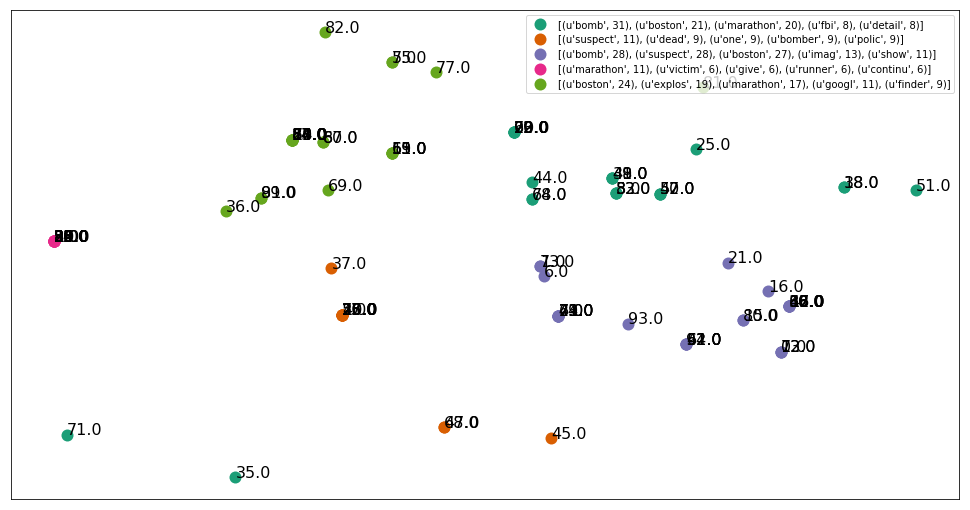

In [287]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, rank=frame['rank'])) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the tweet rank 
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['rank'], size=16)  
 
    
plt.show() #show the plot

#plt.savefig('clusters_small_noaxes.png', dpi=200)